In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('D:\Anaconda\EDA_CoVID_INDO\covid_19_indonesia_time_series_all.csv')
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,35,39,...,106.836118,-6.204699,0.18,45.09,0.00,3.23,7.16%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,35,39,...,106.836118,-6.204699,0.18,45.27,0.00,3.23,7.13%,7.94%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,10,624,...,107.603708,-6.920432,0.07,0.27,0.00,0.22,83.33%,5200.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,2,8,...,101.805109,0.511648,0.16,0.33,0.00,0.33,100.00%,400.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13009,3/28/2021,ID-SG,Sulawesi Tenggara,4,0,1,3,10249,205,9593,...,122.070311,-4.124689,1.52,3888.88,0.00,77.79,2.00%,93.60%,0.31,0.00
13010,3/28/2021,ID-SA,Sulawesi Utara,5,0,4,1,15351,499,12420,...,124.521240,1.259638,1.89,5810.63,0.00,188.88,3.25%,80.91%,0.26,1.00
13011,3/28/2021,ID-SB,Sumatera Barat,106,2,74,30,31455,682,29611,...,100.465062,-0.850253,19.21,5699.15,0.36,123.57,2.17%,94.14%,0.96,2.00
13012,3/28/2021,ID-SS,Sumatera Selatan,101,3,77,21,17443,828,15450,...,104.169465,-3.216212,12.29,2122.65,0.37,100.76,4.75%,88.57%,1.20,1.50


In [22]:
df["Date"] = pd.to_datetime(df["Date"])

In [37]:
df_code=df['Location ISO Code'].value_counts()
df_code

ID-JK    393
ID-JB    392
ID-RI    392
IDN      392
ID-BT    388
ID-SG    384
ID-KI    380
ID-YO    378
ID-SU    377
ID-JI    376
ID-JT    376
ID-SN    375
ID-JA    374
ID-PA    372
ID-MA    372
ID-MU    371
ID-SB    368
ID-LA    368
ID-AC    368
ID-KT    368
ID-ST    368
ID-PB    367
ID-SS    366
ID-KU    366
ID-SR    366
ID-BA    365
ID-KB    365
ID-KR    364
ID-BB    364
ID-KS    364
ID-BE    363
ID-NB    363
ID-SA    362
ID-NT    354
ID-GO    353
Name: Location ISO Code, dtype: int64

# Kasus Terkena Covid-19 dan Kasus Kematian Covid-19 

In [82]:
kasus_keseluruhan = df[df['Location ISO Code']=='IDN']


In [94]:
kasus_covid=kasus_keseluruhan.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian = kasus_keseluruhan.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idn=kasus_keseluruhan.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_diIDN = kasus_covid.join(kasus_kematian).join(kasus_reco_idn)

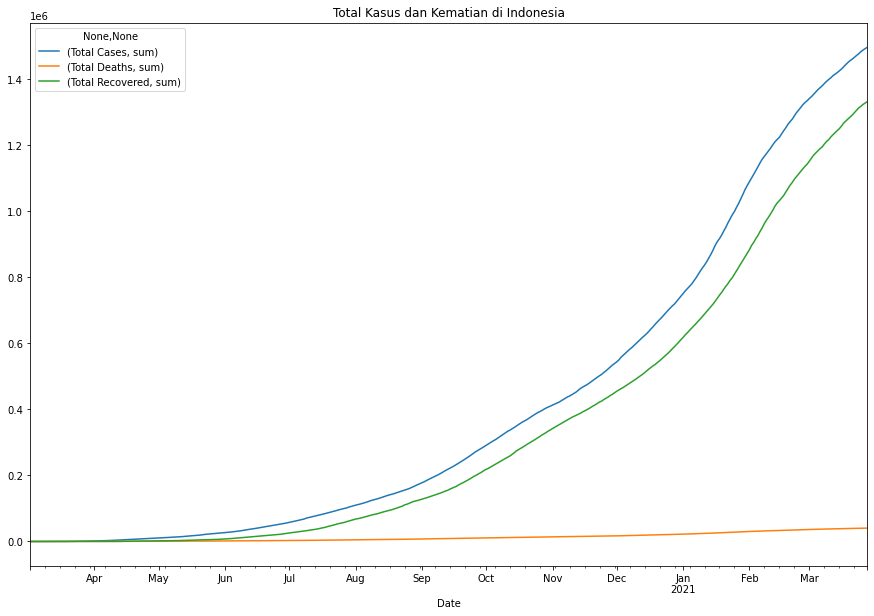

In [95]:
plt.figure(figsize=(15,10))
kasus_diIDN.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Indonesia')

# Kasus di DKI Jakarta

In [81]:
total_kasus_jk= df[df['Location ISO Code']=='ID-JK']


In [96]:
total_jkt=total_kasus_jk.groupby(['Date']).agg({'Total Cases':['sum']})
total_kematian_jkt=total_kasus_jk.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_jkt=total_kasus_jk.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_jk=total_jkt.join(total_kematian_jkt).join(kasus_reco_jkt)

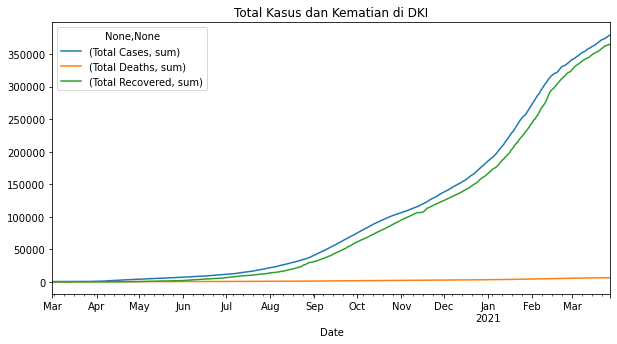

In [111]:
plt.figure(figsize=(10,5))
kasus_jk.plot(ax=plt.gca(), title='Total Kasus dan Kematian di DKI')

# Banten

In [83]:
kasus_banten = df[df['Location ISO Code']=='ID-BT']


In [100]:
kasus_idtb = kasus_banten.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idtb=kasus_banten.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_banten=kasus_banten.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dibanten = kasus_idtb.join(kasus_kematian_idtb).join(kasus_reco_banten)

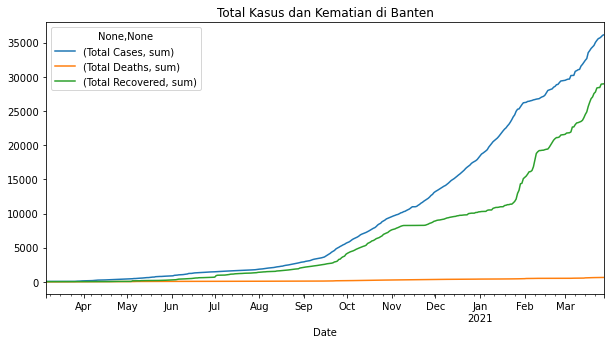

In [110]:
plt.figure(figsize=(10,5))
kasus_dibanten.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Banten')

# Jawa Barat

In [87]:
kasus_jabar = df[df['Location ISO Code']=='ID-JB']

In [91]:
kasus_idjb = kasus_jabar.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idjb=kasus_jabar.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idjb=kasus_jabar.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dijabar = kasus_idjb.join(kasus_kematian_idjb).join(kasus_reco_idjb)

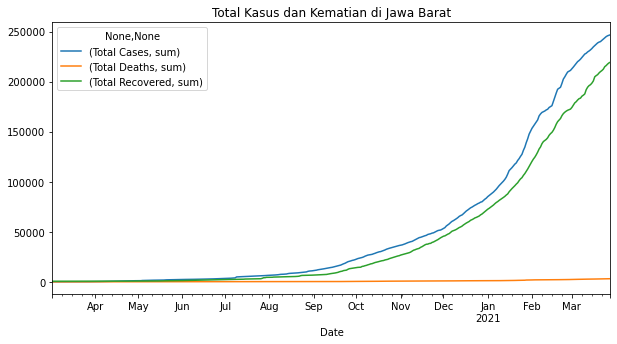

In [112]:
plt.figure(figsize=(10,5))
kasus_dijabar.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Jawa Barat')

# Riau


In [104]:
kasus_Riau = df[df['Location ISO Code']=='ID-RI']

In [105]:
kasus_idri = kasus_Riau.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idri=kasus_Riau.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idri=kasus_Riau.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_diRiau = kasus_idri.join(kasus_kematian_idri).join(kasus_reco_idri)

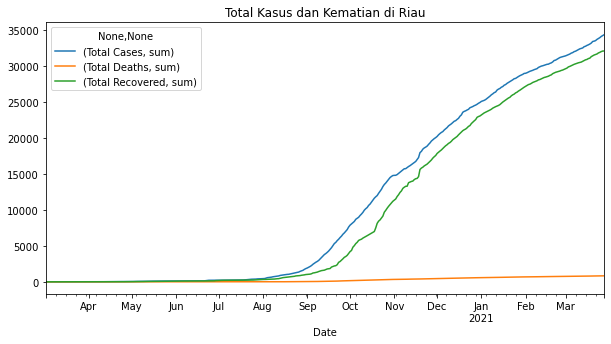

In [108]:
plt.figure(figsize=(10,5))
kasus_diRiau.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Riau')

# Sulawesi Tenggara

In [118]:
kasus_sulteng = df[df['Location ISO Code']=='ID-SG']


In [119]:
kasus_idsg = kasus_sulteng.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idsg=kasus_sulteng.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idsg=kasus_sulteng.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_diSulTeng = kasus_idsg.join(kasus_kematian_idsg).join(kasus_reco_idsg)

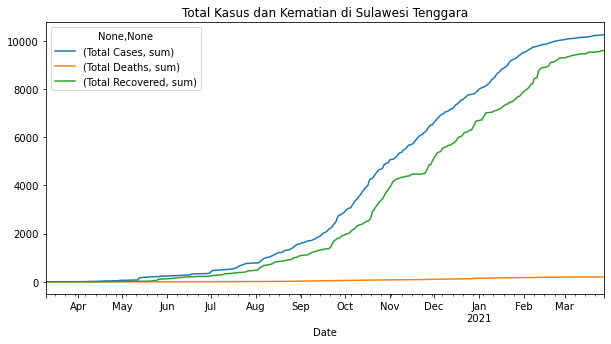

In [121]:
plt.figure(figsize=(10,5))
kasus_diSulTeng.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Sulawesi Tenggara')

# Kalimantan Timur

In [123]:
kasus_kaltim = df[df['Location ISO Code']=='ID-KI']


In [124]:
kasus_idki = kasus_kaltim.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idki=kasus_kaltim.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idki=kasus_kaltim.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dikaltim = kasus_idki.join(kasus_kematian_idki).join(kasus_reco_idki)

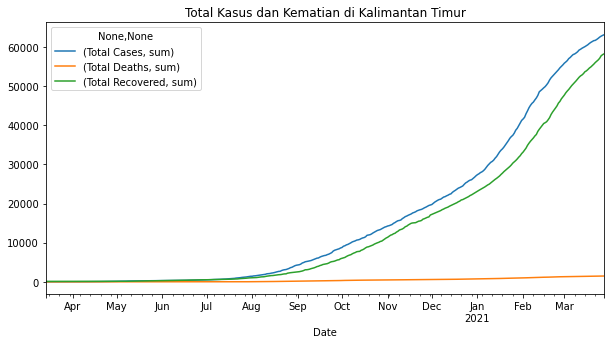

In [125]:
plt.figure(figsize=(10,5))
kasus_dikaltim.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Kalimantan Timur')

# Daerah Istimewa Yogyakarta

In [127]:
kasus_jogja = df[df['Location ISO Code']=='ID-YO']


In [128]:
kasus_idyo = kasus_jogja.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idyo=kasus_jogja.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idyo=kasus_jogja.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_diDIY = kasus_idyo.join(kasus_kematian_idyo).join(kasus_reco_idyo)

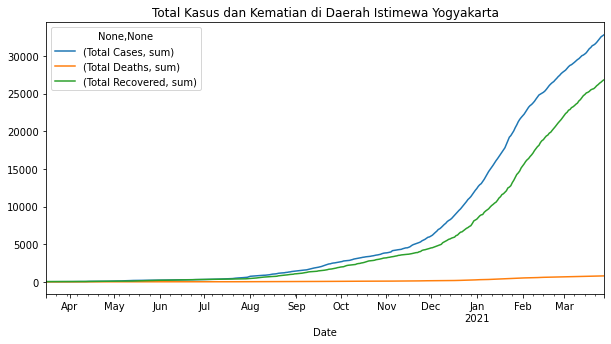

In [129]:
plt.figure(figsize=(10,5))
kasus_diDIY.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Daerah Istimewa Yogyakarta')

# Sumatera Utara

In [131]:
kasus_sumut = df[df['Location ISO Code']=='ID-SU']


In [132]:
kasus_idsu = kasus_sumut.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idsu=kasus_sumut.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idsu=kasus_sumut.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_disumut = kasus_idsu.join(kasus_kematian_idsu).join(kasus_reco_idsu)

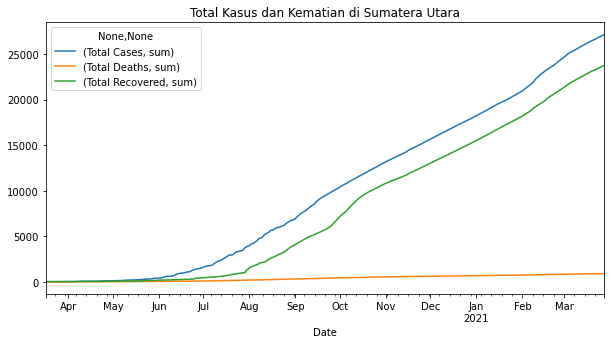

In [133]:
plt.figure(figsize=(10,5))
kasus_disumut.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Sumatera Utara')

# Jawa Timur

In [136]:
kasus_jatim = df[df['Location ISO Code']=='ID-JI']


In [137]:
kasus_idji = kasus_jatim.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idji=kasus_jatim.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idji=kasus_jatim.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dijatim = kasus_idji.join(kasus_kematian_idji).join(kasus_reco_idji)

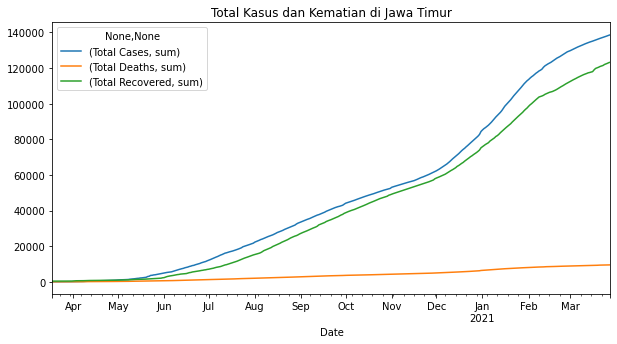

In [138]:
plt.figure(figsize=(10,5))
kasus_dijatim.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Jawa Timur')

# Jawa Tengah

In [140]:
kasus_jateng = df[df['Location ISO Code']=='ID-JT']


In [141]:
kasus_idjt = kasus_jateng.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idjt=kasus_jateng.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idjt=kasus_jateng.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dijateng = kasus_idjt.join(kasus_kematian_idjt).join(kasus_reco_idjt)

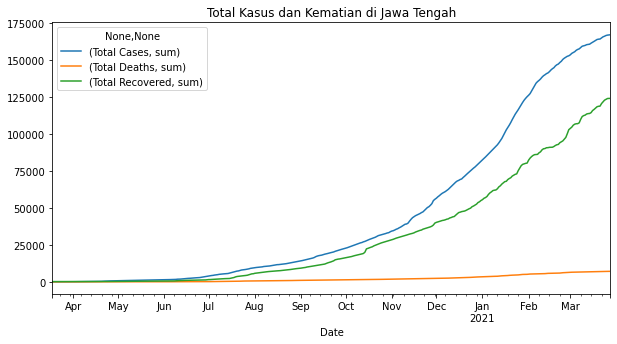

In [142]:
plt.figure(figsize=(10,5))
kasus_dijateng.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Jawa Tengah')

# Sulawesi Selatan

In [144]:
kasus_sulsel = df[df['Location ISO Code']=='ID-SN']


In [145]:
kasus_idsn = kasus_sulsel.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idsn=kasus_sulsel.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idsn=kasus_sulsel.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_disulsel = kasus_idsn.join(kasus_kematian_idsn).join(kasus_reco_idsn)

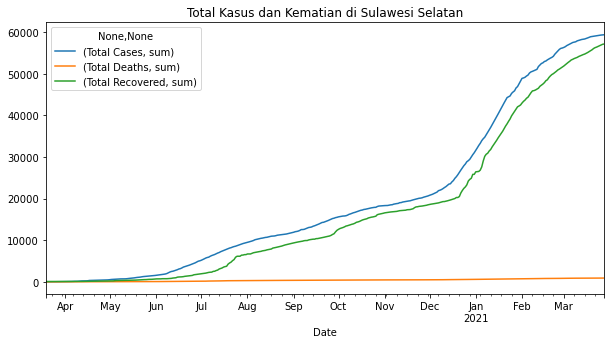

In [146]:
plt.figure(figsize=(10,5))
kasus_disulsel.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Sulawesi Selatan')

# Jambi

In [149]:
kasus_jambi = df[df['Location ISO Code']=='ID-JA']

In [152]:
kasus_idja = kasus_jambi.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idja=kasus_jambi.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idja=kasus_jambi.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dijambi = kasus_idja.join(kasus_kematian_idja).join(kasus_reco_idja)

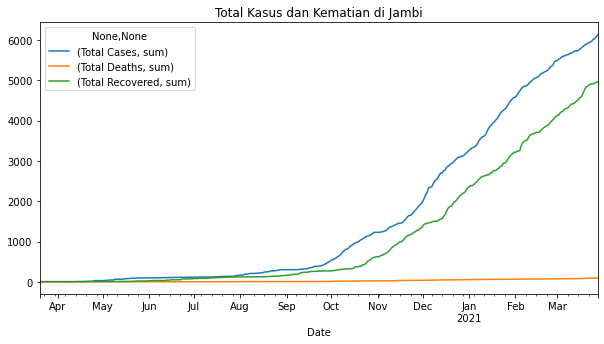

In [153]:
plt.figure(figsize=(10,5))
kasus_dijambi.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Jambi')

# Papua

In [156]:
kasus_papua = df[df['Location ISO Code']=='ID-PA']


In [157]:
kasus_idpa = kasus_papua.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idpa=kasus_papua.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idpa=kasus_papua.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dipapua = kasus_idpa.join(kasus_kematian_idpa).join(kasus_reco_idpa)

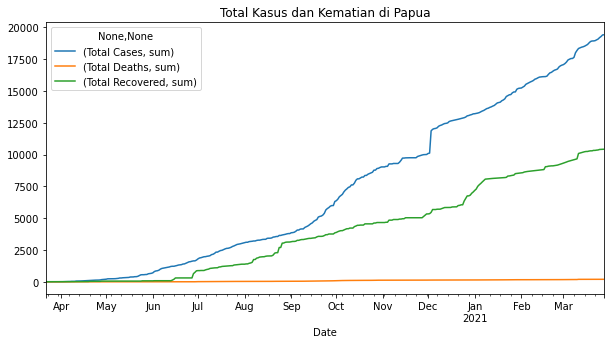

In [158]:
plt.figure(figsize=(10,5))
kasus_dipapua.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Papua')

# Maluku

In [159]:
kasus_maluku = df[df['Location ISO Code']=='ID-MA']


In [160]:
kasus_idma = kasus_maluku.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idma=kasus_maluku.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idma=kasus_maluku.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dimaluku = kasus_idma.join(kasus_kematian_idma).join(kasus_reco_idma)

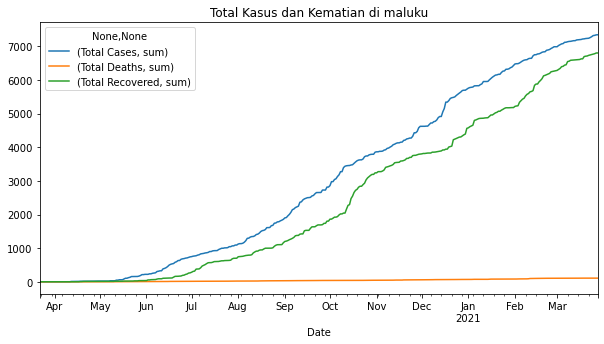

In [161]:
plt.figure(figsize=(10,5))
kasus_dimaluku.plot(ax=plt.gca(), title='Total Kasus dan Kematian di maluku')

# Maluku Utara

In [163]:
kasus_malukuutara = df[df['Location ISO Code']=='ID-MU']

In [164]:
kasus_idmu = kasus_malukuutara.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idmu=kasus_malukuutara.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idmu=kasus_malukuutara.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dimalukuutara = kasus_idmu.join(kasus_kematian_idmu).join(kasus_reco_idmu)

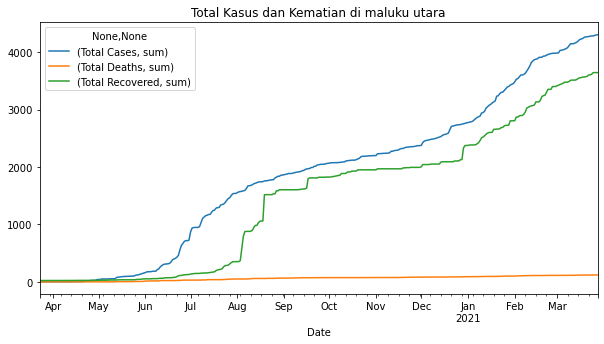

In [165]:
plt.figure(figsize=(10,5))
kasus_dimalukuutara.plot(ax=plt.gca(), title='Total Kasus dan Kematian di maluku utara')

# Sumatera Barat

In [166]:
kasus_padang = df[df['Location ISO Code']=='ID-SB']

In [168]:
kasus_idsb = kasus_padang.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idsb=kasus_padang.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idsb=kasus_padang.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dipadang = kasus_idsb.join(kasus_kematian_idsb).join(kasus_reco_idsb)

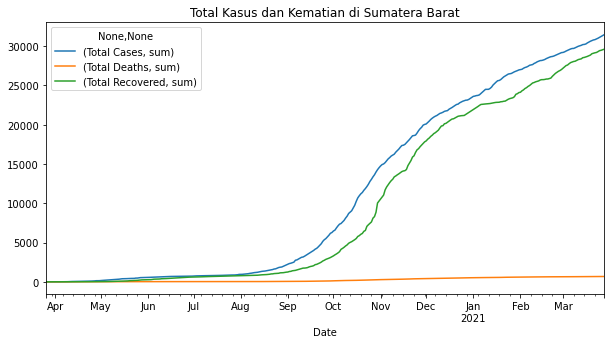

In [169]:
plt.figure(figsize=(10,5))
kasus_dipadang.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Sumatera Barat')

# Lampung

In [170]:
kasus_lampung = df[df['Location ISO Code']=='ID-LA']

In [171]:
kasus_idla = kasus_lampung.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idla=kasus_lampung.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idla=kasus_lampung.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dilampung = kasus_idla.join(kasus_kematian_idla).join(kasus_reco_idla)

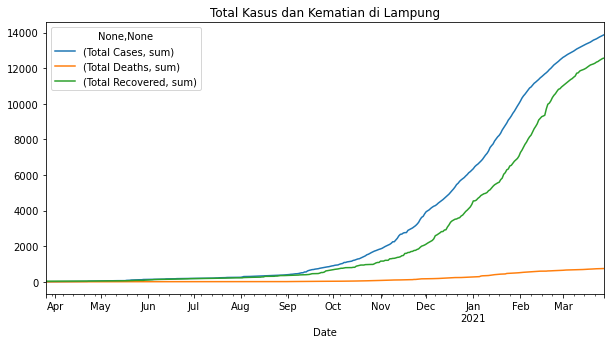

In [172]:
plt.figure(figsize=(10,5))
kasus_dilampung.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Lampung')

# Aceh

In [173]:
kasus_aceh = df[df['Location ISO Code']=='ID-AC']

In [174]:
kasus_idac = kasus_aceh.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idac=kasus_aceh.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idac=kasus_aceh.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_diaceh = kasus_idac.join(kasus_kematian_idac).join(kasus_reco_idac)

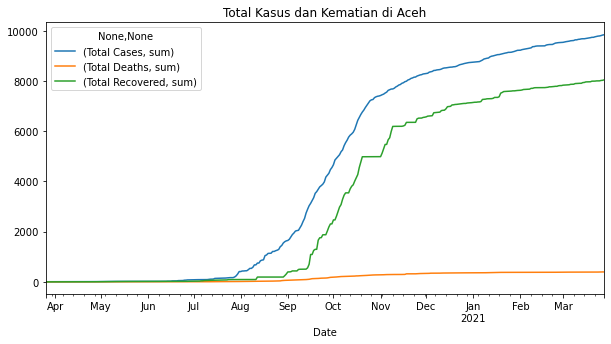

In [175]:
plt.figure(figsize=(10,5))
kasus_diaceh.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Aceh')

# kalimantan tengah


In [176]:
kasus_kalteng = df[df['Location ISO Code']=='ID-KT']

In [177]:
kasus_idkt = kasus_kalteng.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idkt=kasus_kalteng.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idkt=kasus_kalteng.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dikalteng = kasus_idkt.join(kasus_kematian_idkt).join(kasus_reco_idkt)

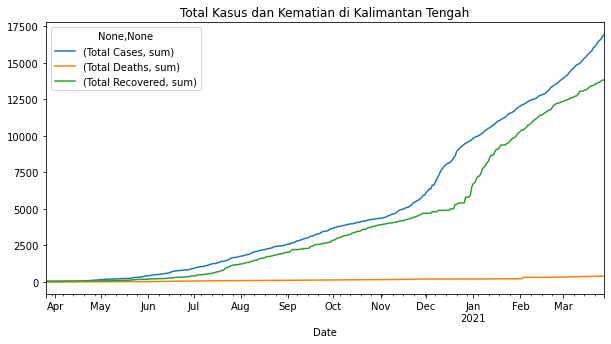

In [178]:
plt.figure(figsize=(10,5))
kasus_dikalteng.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Kalimantan Tengah')

# Sulawesi Tengah

In [180]:
kasus_sultengah = df[df['Location ISO Code']=='ID-ST']

In [181]:
kasus_idst = kasus_sultengah.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idst=kasus_sultengah.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idst=kasus_sultengah.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_disultengah = kasus_idst.join(kasus_kematian_idst).join(kasus_reco_idst)

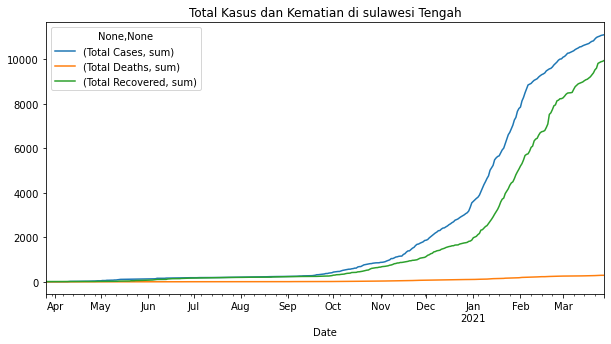

In [182]:
plt.figure(figsize=(10,5))
kasus_disultengah.plot(ax=plt.gca(), title='Total Kasus dan Kematian di sulawesi Tengah')

# Papua Barat


In [183]:
kasus_papuabarat = df[df['Location ISO Code']=='ID-PB']

In [184]:
kasus_idpb = kasus_papuabarat.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idpb=kasus_papuabarat.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idpb=kasus_papuabarat.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dipapuabarat = kasus_idpb.join(kasus_kematian_idpb).join(kasus_reco_idpb)

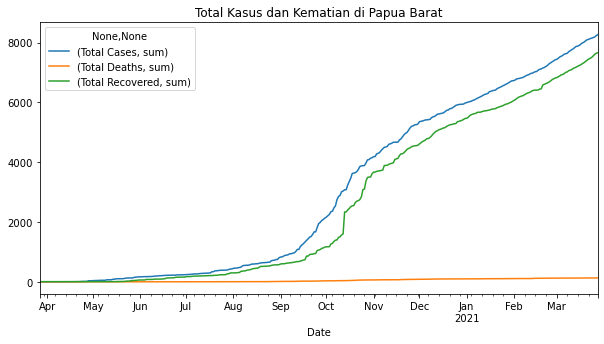

In [185]:
plt.figure(figsize=(10,5))
kasus_dipapuabarat.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Papua Barat')

# Sumatera Selatan

In [186]:
kasus_sumsel = df[df['Location ISO Code']=='ID-SS']

In [187]:
kasus_idss = kasus_sumsel.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idss=kasus_sumsel.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idss=kasus_sumsel.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_disumsel = kasus_idss.join(kasus_kematian_idss).join(kasus_reco_idss)

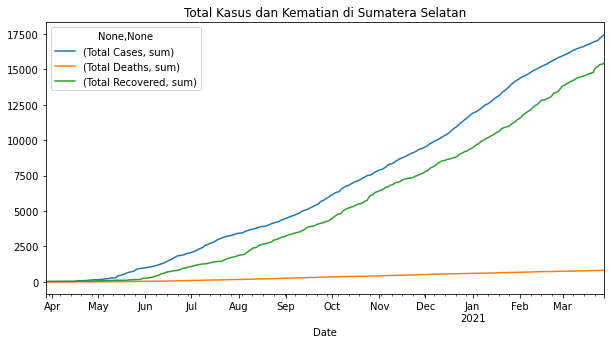

In [188]:
plt.figure(figsize=(10,5))
kasus_disumsel.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Sumatera Selatan')

# Kalimatan Utara

In [189]:
kasus_kalut = df[df['Location ISO Code']=='ID-KU']

In [191]:
kasus_idku = kasus_kalut.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idku=kasus_kalut.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idku=kasus_kalut.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dikalut = kasus_idku.join(kasus_kematian_idku).join(kasus_reco_idku)

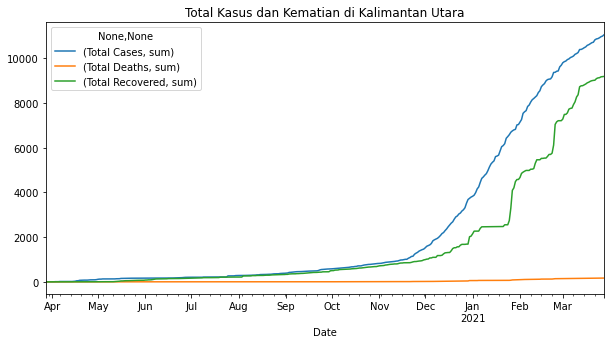

In [192]:
plt.figure(figsize=(10,5))
kasus_dikalut.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Kalimantan Utara')

# Sulawesi Barat

In [193]:
kasus_sulbar = df[df['Location ISO Code']=='ID-SR']

In [194]:
kasus_idsr = kasus_sulbar.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idsr=kasus_sulbar.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idsr=kasus_sulbar.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_disulbar = kasus_idsr.join(kasus_kematian_idsr).join(kasus_reco_idsr)

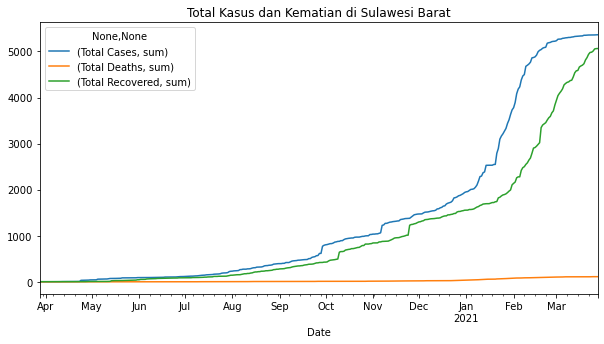

In [195]:
plt.figure(figsize=(10,5))
kasus_disulbar.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Sulawesi Barat')

# Bali

In [196]:
kasus_bali = df[df['Location ISO Code']=='ID-BA']

In [197]:
kasus_idba = kasus_bali.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idba=kasus_bali.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idba=kasus_bali.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dibali = kasus_idba.join(kasus_kematian_idba).join(kasus_reco_idba)

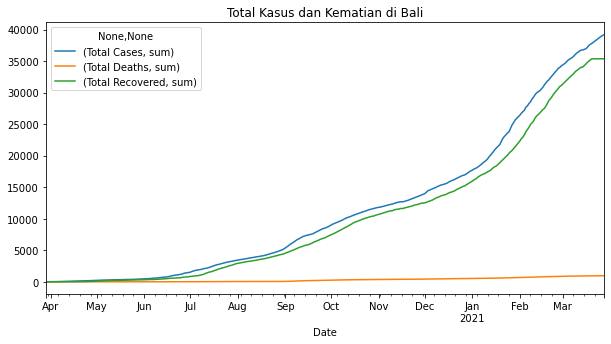

In [198]:
plt.figure(figsize=(10,5))
kasus_dibali.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Bali')

# Kalimantan Barat

In [200]:
kasus_kalbarat = df[df['Location ISO Code']=='ID-KB']


In [201]:
kasus_idkb = kasus_kalbarat.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idkb=kasus_kalbarat.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idkb=kasus_kalbarat.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dikalbarat = kasus_idkb.join(kasus_kematian_idkb).join(kasus_reco_idkb)

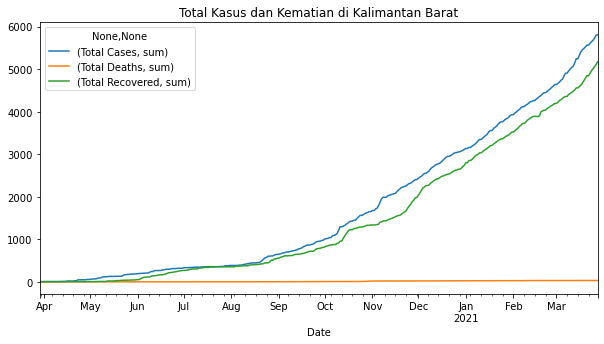

In [202]:
plt.figure(figsize=(10,5))
kasus_dikalbarat.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Kalimantan Barat')

# Kepulauan Riau

In [203]:
kasus_kepulauan = df[df['Location ISO Code']=='ID-KR']

In [205]:
kasus_idkr = kasus_kepulauan.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idkr=kasus_kepulauan.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idkr=kasus_kepulauan.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dikepulauan = kasus_idkr.join(kasus_kematian_idkr).join(kasus_reco_idkr)

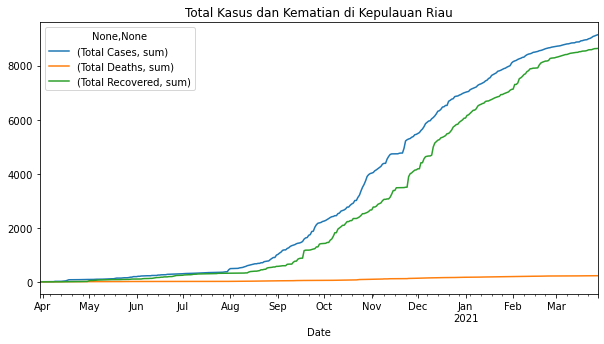

In [206]:
plt.figure(figsize=(10,5))
kasus_dikepulauan.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Kepulauan Riau')

# Kepulauan Bangka Belitung

In [207]:
kasus_kepbb = df[df['Location ISO Code']=='ID-BB']

In [208]:
kasus_idbb = kasus_kepbb.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idbb=kasus_kepbb.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idbb=kasus_kepbb.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dikepbb = kasus_idbb.join(kasus_kematian_idbb).join(kasus_reco_idbb)

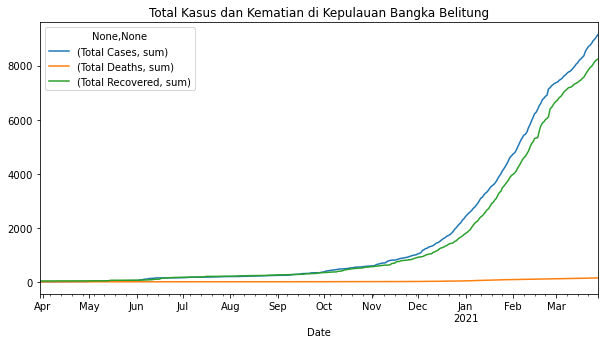

In [212]:
plt.figure(figsize=(10,5))
kasus_dikepbb.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Kepulauan Bangka Belitung')

# Kalimantan Selatan

In [213]:
kasus_kalsel = df[df['Location ISO Code']=='ID-KS']

In [214]:
kasus_idks = kasus_kalsel.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idks=kasus_kalsel.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idks=kasus_kalsel.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dikalsel = kasus_idks.join(kasus_kematian_idks).join(kasus_reco_idks)

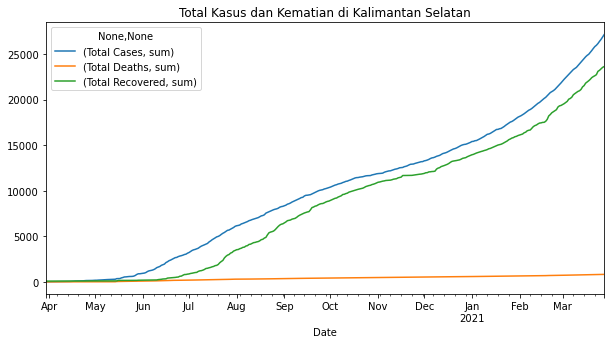

In [215]:
plt.figure(figsize=(10,5))
kasus_dikalsel.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Kalimantan Selatan')

# Bengkulu


In [216]:
kasus_bengkulu = df[df['Location ISO Code']=='ID-BE']

In [217]:
kasus_idbe = kasus_bengkulu.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idbe=kasus_bengkulu.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idbe=kasus_bengkulu.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dibengkulu = kasus_idbe.join(kasus_kematian_idbe).join(kasus_reco_idbe)

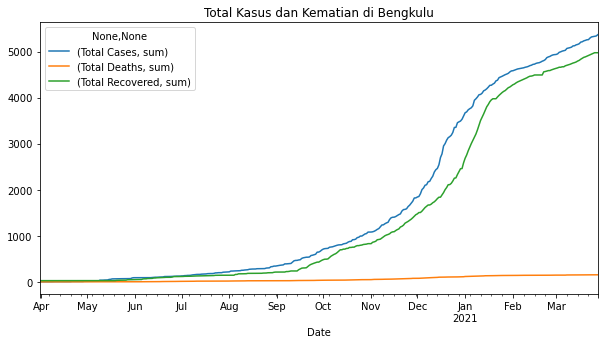

In [218]:
plt.figure(figsize=(10,5))
kasus_dibengkulu.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Bengkulu')

# Nusa Tenggara Barat

In [229]:
kasus_nusatb = df[df['Location ISO Code']=='ID-NB']


In [226]:
kasus_idnb = kasus_nusatb.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idnb=kasus_nusatb.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idnb=kasus_nusatb.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dinusatb = kasus_idnb.join(kasus_kematian_idnb).join(kasus_reco_idnb)

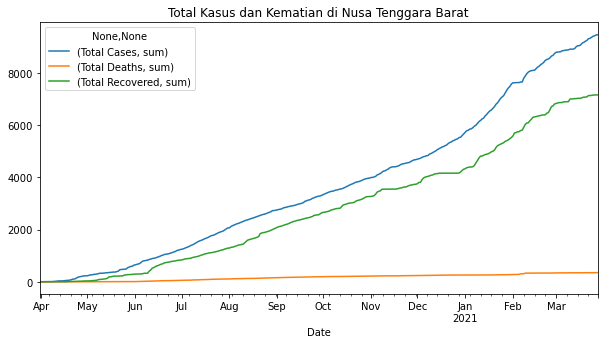

In [228]:
plt.figure(figsize=(10,5))
kasus_dinusatb.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Nusa Tenggara Barat')

# Sulawesi Utara

In [230]:
kasus_sulawesiutara = df[df['Location ISO Code']=='ID-SA']

In [231]:
kasus_idsa = kasus_sulawesiutara.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idsa=kasus_sulawesiutara.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idsa=kasus_sulawesiutara.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_disulawesiutara = kasus_idsa.join(kasus_kematian_idsa).join(kasus_reco_idsa)

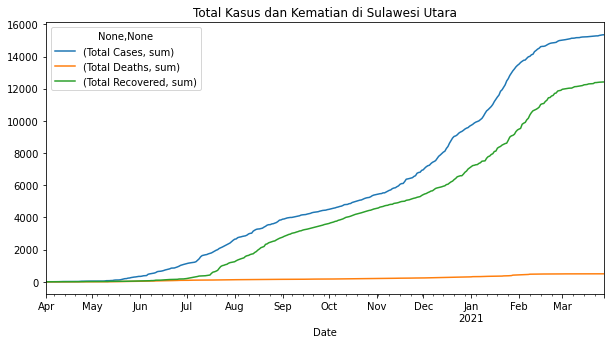

In [232]:
plt.figure(figsize=(10,5))
kasus_disulawesiutara.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Sulawesi Utara')

# Nusa tenggara Timur

In [233]:
kasus_nusatt = df[df['Location ISO Code']=='ID-NT']

In [235]:
kasus_idnt = kasus_nusatt.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idnt=kasus_nusatt.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idnt=kasus_nusatt.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_dinusatt = kasus_idnt.join(kasus_kematian_idnt).join(kasus_reco_idnt)

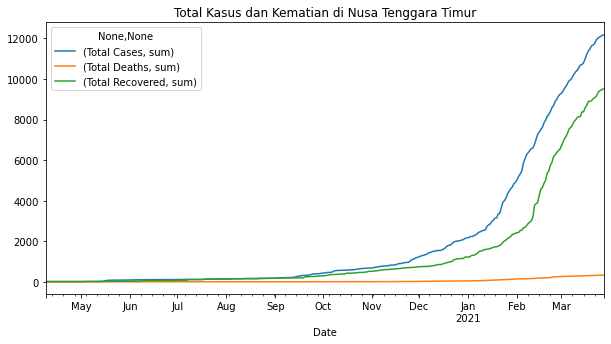

In [236]:
plt.figure(figsize=(10,5))
kasus_dinusatt.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Nusa Tenggara Timur')

# Gorontalo

In [240]:
kasus_goron = df[df['Location ISO Code']=='ID-GO']


In [241]:
kasus_idgo = kasus_goron.groupby(['Date']).agg({'Total Cases':['sum']})
kasus_kematian_idgo=kasus_goron.groupby(['Date']).agg({'Total Deaths':['sum']})
kasus_reco_idgo=kasus_goron.groupby(['Date']).agg({'Total Recovered':['sum']})
kasus_digoron = kasus_idgo.join(kasus_kematian_idgo).join(kasus_reco_idgo)

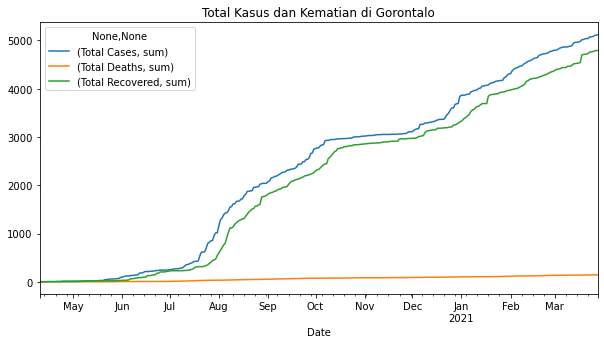

In [242]:
plt.figure(figsize=(10,5))
kasus_digoron.plot(ax=plt.gca(), title='Total Kasus dan Kematian di Gorontalo')